## SOLAR DATA

# Load data/import packages

In [ ]:
#import packages
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math
from math import log
from matplotlib import style

import pandas as pd
import numpy as np
from math import exp
from math import sqrt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split 
from datetime import datetime
from pandas.plotting import scatter_matrix

from keras.layers.core import Activation, Dense, Dropout
model = Sequential()

!pip install statsmodels
!pip install scipy
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()

Mounted at /content/drive


Saving maabarot_johnson_from_2010_04_22_to_2020_12_31.csv to maabarot_johnson_from_2010_04_22_to_2020_12_31.csv


In [ ]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded['maabarot_johnson_from_2010_04_22_to_2020_12_31.csv']))
data.head() #visualize data

,timestamp,min_power,mean_power,max_power
0,2010-04-22 01:00:00,0,0,0
1,2010-04-22 02:00:00,0,0,0
2,2010-04-22 03:00:00,0,0,0
3,2010-04-22 04:00:00,0,0,0
4,2010-04-22 05:00:00,0,0,0


# Clean data

In [ ]:
data.dtypes #data types in each variable

timestamp     object
min_power      int64
mean_power     int64
max_power      int64
dtype: object

In [ ]:
print(type(data['timestamp'][0])) #type of variable withing 'timestamp'

<class 'str'>


In [ ]:
from datetime import datetime

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
print(data)
data.dtypes

                timestamp  min_power  mean_power  max_power
0     2010-04-22 01:00:00          0           0          0
1     2010-04-22 02:00:00          0           0          0
2     2010-04-22 03:00:00          0           0          0
3     2010-04-22 04:00:00          0           0          0
4     2010-04-22 05:00:00          0           0          0
...                   ...        ...         ...        ...
92899 2020-12-31 20:00:00          0           0          0
92900 2020-12-31 21:00:00          0           0          0
92901 2020-12-31 22:00:00          0           0          0
92902 2020-12-31 23:00:00          0           0          0
92903 2020-12-31 00:00:00          0           0          0

[92904 rows x 4 columns]


timestamp     datetime64[ns]
min_power              int64
mean_power             int64
max_power              int64
dtype: object

In [ ]:
new_df = data
new_df
new_df.dtypes

timestamp     datetime64[ns]
min_power              int64
mean_power             int64
max_power              int64
dtype: object

In [ ]:
!pip install pandasql
import pandasql as ps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=9a1c8edcd50650ffc379723e5c6d9910a9a09a6bc2715ff121af60d7c6dec31d
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
query = """SELECT * FROM new_df WHERE TIME(timestamp) BETWEEN TIME('05:00:00') AND TIME('19:00:00') AND mean_power = 0"""
zero_df = ps.sqldf(query, locals()) #query data via sql

In [ ]:
zero_df

,timestamp,min_power,mean_power,max_power
0,2010-04-22 05:00:00.000000,0,0,0
1,2010-04-22 06:00:00.000000,0,0,0
2,2010-04-22 07:00:00.000000,0,0,0
3,2010-04-22 08:00:00.000000,0,0,0
4,2010-04-22 09:00:00.000000,0,0,0
...,...,...,...,...
11210,2020-12-31 05:00:00.000000,0,0,0
11211,2020-12-31 06:00:00.000000,0,0,0
11212,2020-12-31 07:00:00.000000,0,0,0
11213,2020-12-31 18:00:00.000000,0,0,0


In [ ]:
zero_df['timestamp'] = pd.to_datetime(zero_df['timestamp'])

In [ ]:
final_df = pd.merge(new_df,zero_df, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [ ]:
final_df

,timestamp,min_power,mean_power,max_power
0,2010-04-22 01:00:00,0,0,0
1,2010-04-22 02:00:00,0,0,0
2,2010-04-22 03:00:00,0,0,0
3,2010-04-22 04:00:00,0,0,0
15,2010-04-22 16:00:00,36830,38520,40180
...,...,...,...,...
92899,2020-12-31 20:00:00,0,0,0
92900,2020-12-31 21:00:00,0,0,0
92901,2020-12-31 22:00:00,0,0,0
92902,2020-12-31 23:00:00,0,0,0


In [ ]:
final_df.to_csv('johnson_non_zero.csv')

In [ ]:
query2 = """SELECT AVG(mean_power) FROM final_df GROUP BY TIME(timestamp)"""
answer_avg = ps.sqldf(query2, locals())

In [ ]:
answer_avg = answer_avg.rename(columns={'AVG(mean_power)': 'Average Mean Power'})

In [ ]:
answer_avg.index.names = ['Timestamp']
answer_avg

,Average Mean Power
Timestamp,
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,1.000000
6,58.317972
7,752.312919
8,4544.258710


# Data Visualization


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y_data_df = []
for i in answer_avg['Average Mean Power']:
    y_data_df.append(float(i/1000))

x_data_df = []
for i in answer_avg.index:
    x_data_df.append(i)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

<Figure size 432x288 with 0 Axes>

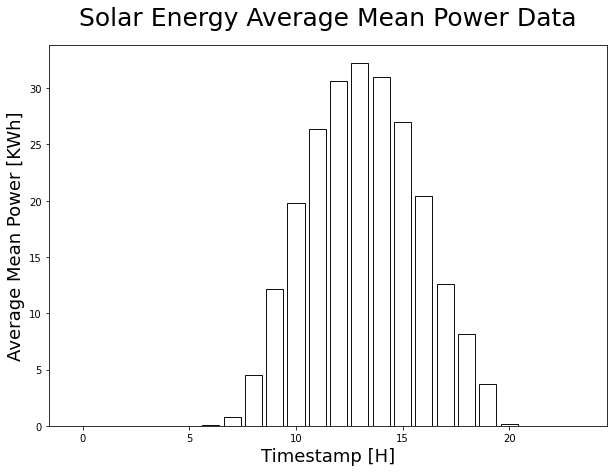

In [ ]:
fig=plt.figure()

plt.figure(figsize=(10,7))
plt.bar(x=x_data_df, height=y_data_df,color='white', edgecolor='#111111')
plt.title("Solar Energy Average Mean Power Data", fontsize=25, pad=20)
plt.xlabel('Timestamp [H]', fontsize=18)
plt.ylabel('Average Mean Power [KWh]', fontsize=18)
# plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d KWh'))
# plt.fill_between(x_data_df, y_data_df,color='#000000')
# plt.figure(figsize=(5, 5))

plt.show()

In [ ]:
std_df = final_df.groupby([final_df['timestamp'].dt.time])['mean_power'].std()
std_df

timestamp
00:00:00        0.000000
01:00:00        0.000000
02:00:00        0.000000
03:00:00        0.000000
04:00:00        0.000000
05:00:00             NaN
06:00:00      128.902688
07:00:00      772.820909
08:00:00     2796.011445
09:00:00     4897.048252
10:00:00     6639.720713
11:00:00     8014.859096
12:00:00     9176.161208
13:00:00     9857.782256
14:00:00    10168.613918
15:00:00    10517.485378
16:00:00    10829.783512
17:00:00     9831.566370
18:00:00     5922.596003
19:00:00     1639.595242
20:00:00      292.538621
21:00:00        0.000000
22:00:00        0.000000
23:00:00        0.000000
Name: mean_power, dtype: float64

In [ ]:
std_list = []
for i in std_df:
    if str(i) == 'nan':
        i = 0.0
    std_list.append(float(i/1000))
std_list #gets rid of NaN value

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1289026883161436,
 0.7728209087469269,
 2.7960114450645484,
 4.897048251972589,
 6.639720713092519,
 8.014859096121166,
 9.176161207971699,
 9.857782255864995,
 10.168613918125509,
 10.51748537828239,
 10.829783512151334,
 9.831566369734418,
 5.922596002946926,
 1.6395952423027391,
 0.2925386208124717,
 0.0,
 0.0,
 0.0]

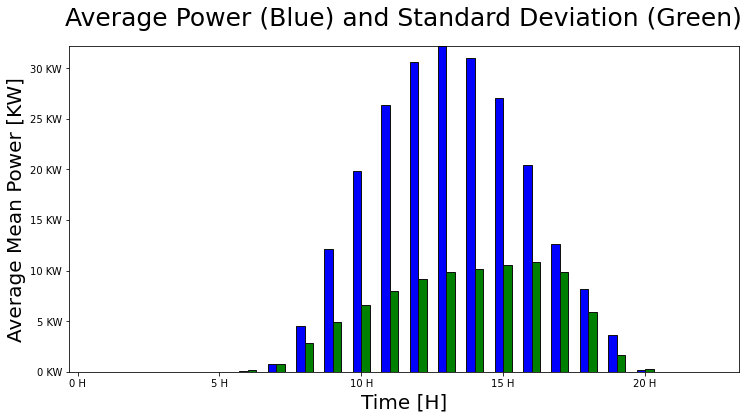

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))
labels = x_data_df
avg_data = y_data_df
std_data = std_list

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

# fig, ax = plt.subplots()
plt.bar(x - width/2, avg_data, width, color='blue', edgecolor='#111111', label='Average Mean Power [KW]')
plt.bar(x + width/2, std_data, width, color='green', edgecolor='#111111', label='Standard Deviation')

plt.xlabel('Time [H]', fontsize=20)
plt.ylabel('Average Mean Power [KW]', fontsize=20)
plt.title("Average Power (Blue) and Standard Deviation (Green)", fontsize=25, pad=20)

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d H'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d KW'))
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.margins(x=0)
plt.margins(y=0)
# plt.legend()

plt.show()

# Implement ARIMA Algorithm

In [ ]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

datatest = adfuller(data["max_power"], autolag="AIC") #autolag = Method to use when automatically determining the lag

dfoutput = pd.Series(datatest[0:4], index=["Test Stats", "p-value", "# Lags", "# of obs"])
for key, value in datatest[4].items():
    dfoutput[f"Critical Value ({key})"] = value
print(dfoutput)

#p-value >= 0.05, meaning that our data is not stationary

Test Stats             -1.423565e+01
p-value                 1.568960e-26
# Lags                  6.700000e+01
# of obs                9.283600e+04
Critical Value (1%)    -3.430420e+00
Critical Value (5%)    -2.861571e+00
Critical Value (10%)   -2.566787e+00
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data["1st_diff"] = data["max_power"].diff()
data["2nd_diff"] = data["1st_diff"].diff()

fig = make_subplots(rows=2, cols=1)

for idx, d in enumerate(["1st_diff", "2nd_diff"]):
    fig.add_trace(
        go.Scatter(
            name = d,
            x = data.index,
            y = data[d]
        ),
        row=idx+1,col=1
    )
fig.update_layout(
    title="Differenced plots"
)
fig.show()

plot_acf(data["1st_diff"].dropna());

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install pmdarima

import pmdarima as pm

model = pm.auto_arima(data.max_power, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 7.0 MB/s 
     |████████████████████████████████| 9.8 MB 29.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1831779.920, Time=6.58 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2086065.217, Time=0.77 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1857547.853, Time=0.98 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1980224.075, Time=12.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1808204.219, Time=9.81 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1811912.724, Time=2.46 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1807476.459, Time=13.81 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1807476.562, Time=3.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1806112.309, Time=35.23 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1807125.511, Time=8.12 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1802848.193, Time=81.16 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1806902.112, Time=11.12 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1797555.677, Time=90.36 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1799494.211,

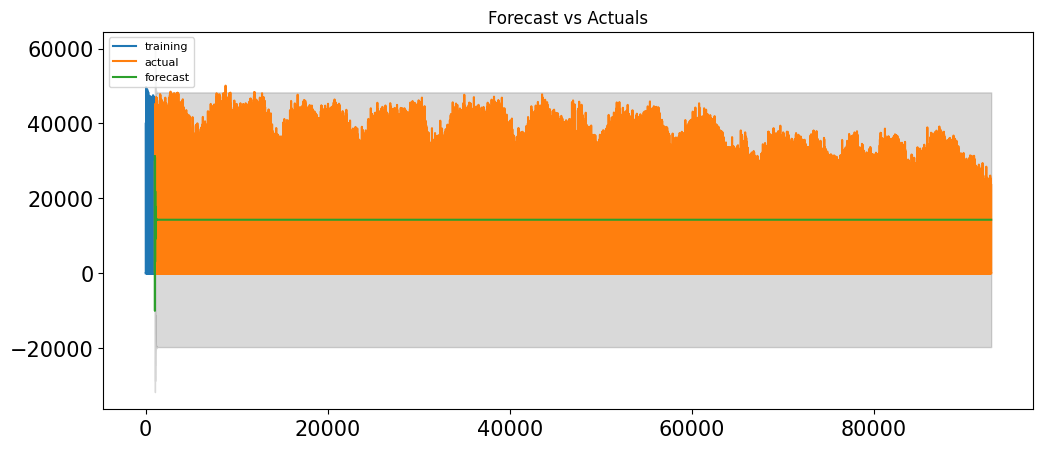

In [ ]:

train = data.max_power[:1000]
test  = data.max_power[1000:]

model = ARIMA(train, order=(3, 0, 3))
fit_model = model.fit(disp=-1)

fc, se, conf = fit_model.forecast(91904, alpha=0.05)  # 95% conf

fc_series    = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                    color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# CARBON PRICE DATA

# Load packages/import data

In [2]:
#import packages
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math
from math import log
from matplotlib import style

import pandas as pd
import numpy as np
from math import exp
from math import sqrt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split 
from datetime import datetime
from pandas.plotting import scatter_matrix

from keras.layers.core import Activation, Dense, Dropout
model = Sequential()

!pip install statsmodels
!pip install scipy
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving cl_sample_dataset.csv to cl_sample_dataset (1).csv


In [4]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded['cl_sample_dataset.csv']))
data.head() #visualize data

,date,place,open,close,high,low,change,pct_chg,vol,amount
0,20210831,GDEA,38.74,39.89,39.98,38.22,1.15,2.97,52780,2105186.21
1,20210830,GDEA,39.70,38.74,40,37.7,-0.96,-2.42,51372,1938146.70
2,20210827,GDEA,38.05,39.70,39.7,38.99,1.65,4.34,50330,1997869.20
3,20210826,GDEA,39.28,38.05,41.48,37.5,-1.23,-3.13,59124,2222257.12
4,20210825,GDEA,38.11,39.28,39.48,37.89,1.17,3.07,58836,2311096.13


# Build model

In [5]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

datatest = adfuller(data["close"], autolag="AIC") #autolag = Method to use when automatically determining the lag

dfoutput = pd.Series(datatest[0:4], index=["Test Stats", "p-value", "# Lags", "# of obs"])
for key, value in datatest[4].items():
    dfoutput[f"Critical Value ({key})"] = value
print(dfoutput)

#p-value >= 0.05, meaning that our data is not stationary

Test Stats                 0.320046
p-value                    0.978246
# Lags                    17.000000
# of obs                1582.000000
Critical Value (1%)       -3.434490
Critical Value (5%)       -2.863369
Critical Value (10%)      -2.567744
dtype: float64


# Clean data

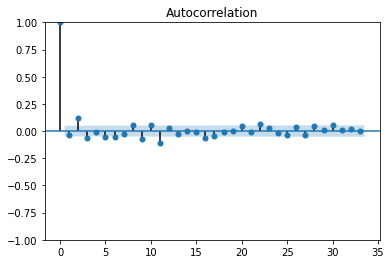

In [6]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data["1st_diff"] = data["close"].diff()
data["2nd_diff"] = data["1st_diff"].diff()

fig = make_subplots(rows=2, cols=1)

for idx, d in enumerate(["1st_diff", "2nd_diff"]):
    fig.add_trace(
        go.Scatter(
            name = d,
            x = data.index,
            y = data[d]
        ),
        row=idx+1,col=1
    )
fig.update_layout(
    title="Differenced plots"
)
fig.show()

plot_acf(data["1st_diff"].dropna());

# Implement ARIMA Algorithm

In [8]:
!pip install pmdarima

from pandas.util._decorators import Appender
import pmdarima as pm

model = pm.auto_arima(data.close, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4901.056, Time=2.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4927.117, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4927.398, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4927.719, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4925.380, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4905.775, Time=1.50 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4905.109, Time=0.90 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4908.487, Time=0.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4907.772, Time=0.44 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4900.490, Time=3.62 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4898.665, Time=3.57 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4896.961, Time=2.57 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4904.380, Time=0.77 sec


NameError: ignored

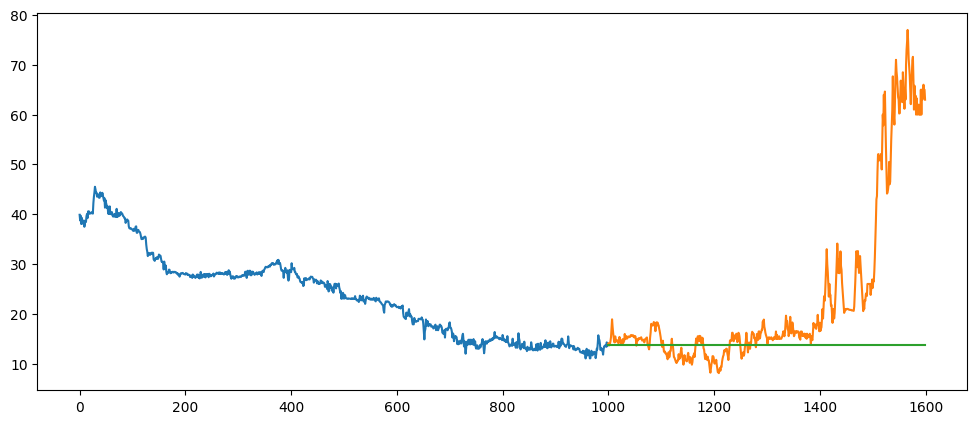

In [33]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

train = data.close[:1000]
test  = data.close[1000:]

model = sm.tsa.arima.ARIMA(train, order=(3,1,1))
fit_model = model.fit()


fc, se, conf = fit_model.forecast(3, alpha=0.05)  # 95% conf

fc_series    = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                    color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()